## Proactive Detection Fraud
- Open this file in Google Colaboratory so that there will be no need to install any new modules.
- The File Path for Fraud.csv is custom for everyone, first upload the csv file to google drive in the same directory as the ipynb colab file and then mention the path.

### Importing the Required Modules

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot

---

### Mounting Drive to Access the <b>Fraud.csv</b> File

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Internship Stuff/INSAID/Fraud.csv')
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
data.shape

(6362620, 11)

---

### Cleaning Null Values

In [ ]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


From the Output Above, we can see that there are no Null Values to remove from the Datset.

---

### Cleaning Outliers

In [ ]:
def find_outliers_IQR(data):
  Q1 = data.quantile(0.25) # First Quartile of the Data
  Q3 = data.quantile(0.75) # Third Quartile of the Data
  IQR = Q3 - Q1            # Inter Quartile Range
  outliers = data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))]
  return outliers

In [ ]:
Q1 = data.quantile(0.25) # First Quartile of the Data
Q3 = data.quantile(0.75) # Third Quartile of the Data
IQR = Q3 - Q1            # Inter Quartile Range
data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))] # Here, NaN is not an Outlying Value

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743.0,NaN,NaN,NaN,339682.13,NaN,NaN,NaN,NaN,1.0,NaN
6362616,743.0,NaN,6311409.28,NaN,6311409.28,NaN,NaN,NaN,NaN,1.0,NaN
6362617,743.0,NaN,6311409.28,NaN,6311409.28,NaN,NaN,NaN,6379898.11,1.0,NaN
6362618,743.0,NaN,850002.52,NaN,850002.52,NaN,NaN,NaN,NaN,1.0,NaN


In [ ]:
outliers = find_outliers_IQR(data)
print("Number of Outliers: \n" + str(len(outliers)))
print('----------------------------------------------')
print("Max Outlying Value: \n" + str(outliers.max()))
print('----------------------------------------------')
print("Min Outlying Value: \n" + str(outliers.min()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


Number of Outliers: 
6362620
----------------------------------------------
Max Outlying Value: 
step                     743.0
type                      None
amount             92445516.64
nameOrig                  None
oldbalanceOrg      59585040.37
newbalanceOrig     49585040.37
nameDest                  None
oldbalanceDest    356015889.35
newbalanceDest    356179278.92
isFraud                    1.0
isFlaggedFraud             1.0
dtype: object
----------------------------------------------
Min Outlying Value: 
step                   604.0
type                    None
amount             501719.38
nameOrig                None
oldbalanceOrg       268289.0
newbalanceOrig     360646.21
nameDest                None
oldbalanceDest    2357595.15
newbalanceDest     2779776.1
isFraud                  1.0
isFlaggedFraud           1.0
dtype: object


From the Output Above, we can see that we have a lot of Outlying Values to remove from almost every Column in the given Dataset.

In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
print(data["amount"].quantile(0.5))
print(data["amount"].quantile(0.95))
print(data["amount"].quantile(0.75))

74871.94
518634.19649999996
208721.4775


In [ ]:
def remove_outliers(column):
  average = data[column].quantile(0.5)  # Low Limit
  outlier = data[column].quantile(0.95) # High Limit
  replace = data[column].quantile(0.75)
  data[column] = np.where(data[column] > outlier, average, data[column]) 

In [ ]:
remove_outliers("amount")
remove_outliers("oldbalanceOrg")
remove_outliers("newbalanceOrig")
remove_outliers("oldbalanceDest")
remove_outliers("newbalanceDest")

In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.109503e+05,2.577469e+05,2.705969e+05,5.696983e+05,6.591352e+05,1.290820e-03,2.514687e-06
std,1.423320e+02,1.195418e+05,8.387705e+05,8.744398e+05,9.858265e+05,1.071810e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487187e+04,1.420800e+04,0.000000e+00,1.327056e+05,2.146613e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,1.768019e+05,6.949825e+04,7.645279e+04,6.771011e+05,8.236797e+05,0.000000e+00,0.000000e+00
max,7.430000e+02,5.186342e+05,5.823702e+06,5.980262e+06,5.147230e+06,5.515715e+06,1.000000e+00,1.000000e+00


From the Output Above, we can see that the <b>max</b> value has changed, which means that the Outliers have been removed.

---

### Removing Multi-Collinearity

In [ ]:
data = data.drop(["nameOrig", "nameDest"],axis=1)

In [ ]:
X = data[list(data.columns[3:7])]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
1,20.259294,newbalanceOrig
0,20.195940,oldbalanceOrg
2,7.360381,oldbalanceDest
3,7.239394,newbalanceDest


From the Output Above, we can see that we have some Multi-Collinearity to remove from the Dataset.

In [ ]:
data["balanceOrigDiff"] = data["newbalanceOrig"] - data["oldbalanceOrg"]
data["balanceDestDiff"] = data["newbalanceDest"] - data["oldbalanceDest"]
X = data.drop(["newbalanceOrig", "oldbalanceOrg", "newbalanceDest", "oldbalanceDest"], axis=1)
X.head()

,step,type,amount,isFraud,isFlaggedFraud,balanceOrigDiff,balanceDestDiff
0,1,PAYMENT,9839.64,0,0,-9839.64,0.0
1,1,PAYMENT,1864.28,0,0,-1864.28,0.0
2,1,TRANSFER,181.00,1,0,-181.00,0.0
3,1,CASH_OUT,181.00,1,0,-181.00,-21182.0
4,1,PAYMENT,11668.14,0,0,-11668.14,0.0


In [ ]:
X = data[list(data.columns[-2:])]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
1,1.005359,balanceDestDiff
0,1.005359,balanceOrigDiff


From the Output Above, we can see that the <b>VIF</b> value is below 5, which means that the Multi-Collinearity has been removed.



---

### Designing the Model

In [ ]:
Fraud = data[data["isFraud"] == 1]
Valid = data[data["isFraud"] == 0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print("Fraud Cases: {}".format(len(data[data["isFraud"] == 1])))
print("Valid Transactions: {}".format(len(data[data["isFraud"] == 0])))

0.0012924888191769902
Fraud Cases: 8213
Valid Transactions: 6354407


From the Output Above, we can say that there are only 0.12% of Fraudulent Tansactions out all the Transactions.

In [ ]:
print("Amount Details of Fraudulent Transactions:")
print(Fraud.describe().amount)

Amount Details of Fraudulent Transactions:
count      8213.000000
mean     130291.642664
std      116908.166169
min           0.000000
25%       74871.940000
50%       74871.940000
75%      156220.740000
max      517183.380000
Name: amount, dtype: float64


In [ ]:
print("Amount Details of Valid Transactions:")
print(Valid.describe().amount)

Amount Details of Valid Transactions:
count    6.354407e+06
mean     1.109253e+05
std      1.195432e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      1.768241e+05
max      5.186342e+05
Name: amount, dtype: float64


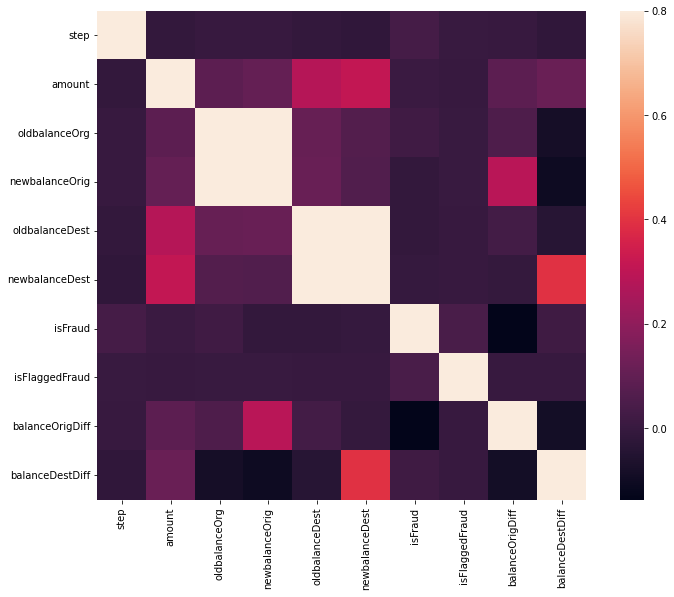

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other.

In [ ]:
X = data[["isFraud"]]
Y = data["isFlaggedFraud"]
print(X.shape)
print(Y.shape)
X_data = X.values
Y_data = Y.values

(6362620, 1)
(6362620,)


---

### Defining the Training and Testing Variables

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

## Unsupervised Machine Learning Model

#### Isolation Forest
- This is an <b>Unsupervised</b> Machine Learning Algorithm generally used for Anomaly detection.
- Requires Less Memory as Compared to other Algorithms.
- The Accuracy of Isolation Forest and Local Outlier issue is calculated to point out the most effective Rule for Fraud Detection

### Training the Model

In [ ]:
ifc = IsolationForest(max_samples=len(X_train), contamination=outlier_fraction,random_state=1)
ifc.fit(X_train)
scores_pred = ifc.decision_function(X_train)
y_pred = ifc.predict(X_test)

In [ ]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y_test).sum()

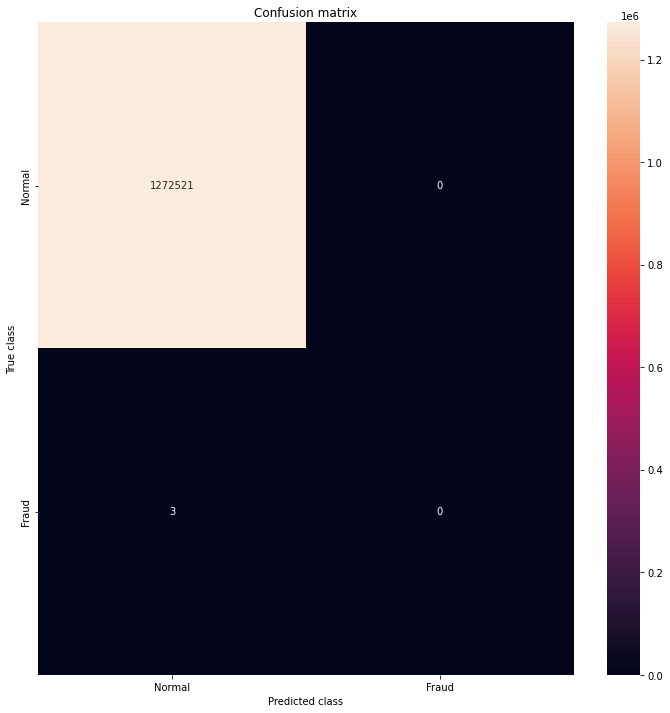

In [ ]:
LABELS = ["Normal", "Fraud"]
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

---

### Evaluating the Model

In [ ]:
n_outliers = len(Fraud)
print("the Model used is {}".format("Isolation Forest"))
acc= accuracy_score(Y_test,y_pred)
print("The accuracy is {}".format(acc))
prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))

the Model used is Isolation Forest
The accuracy is 0.9999976424806133


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is0.0


---

## Supervised Machine Learning Model

#### Random Forest
- This is an <b>Supervised</b> Machine Learning Algorithm generally used for Anomaly detection.
- It is an Ensembling applied to the Decision Tree
- If the Dataset has sufficient number of Fraud Examples, this algorithm can be used for classification and Fraud Detection.

### Training the Model

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
# Predictions
y_pred = rfc.predict(X_test)

---

### Evaluating the Model

In [ ]:
n_outliers = len(Fraud)
n_errors = (y_pred != Y_test).sum()
print("The model used is Random Forest classifier")
acc= accuracy_score(Y_test,y_pred)
print("The accuracy is {}".format(acc))
prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9999976424806133


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is0.0


The First time we run the code, we get the precision, recall, f1-score and matthews correlation coefficient values. from the second time onwards, we get 0.

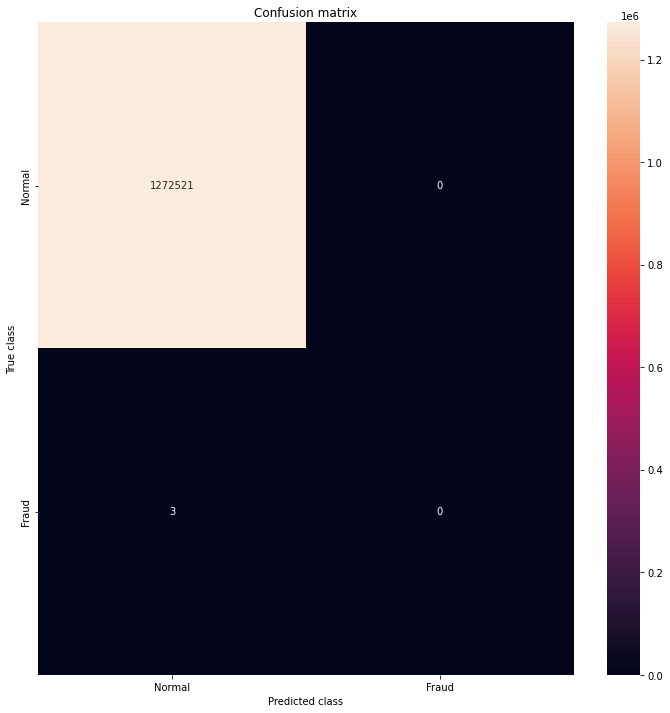

In [ ]:
LABELS = ["Normal", "Fraud"]
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

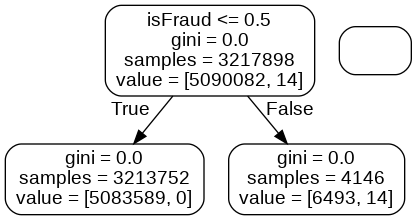

In [ ]:
#visualizing the random tree 
feature_list = list(X.columns)
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = "tree.dot", feature_names = feature_list, rounded = True, precision = 1)
(graph,) = pydot.graph_from_dot_file("tree.dot")
display(Image(graph.create_png()))

### What kind of prevention should be adopted while company update its infrastructure?

Fraud prevention and detection is a continuous, ongoing process and the key to prevention is to detect it right at the stage of origination on a real time basis. However, it is easier said than done. Machine learning (ML) and Artificial Intelligence (AI) algorithms offer an effective counter for fraud detection and prevention. Based on the learning from the historical patterns in data, current sets of transactions can be analysed before lending companies decide to proceed with a particular application.

Multiple variables relating to transactions such as income, location, employment history, education, digital identities (phone number and email id) will be analysed for the possibility of fabricated detail in the application form. Similarly, fraudsters also come up with newer ways to bypass the checks in place. Hence, for any company, making the algorithms better by training them on newer methods is important to stay ahead in the game. The use of reinforcement learning through machine learning algorithms can continuously take feedback from humans and learn to become increasingly accurate with time. However, it can be an expensive affair for small and medium size companies.

### Assuming these actions have been implemented, how would you determine if they work?
Simple, if the model has greater accuracy values, that means it is working very well.